# Binary Logistic Regression for Predicting Titanic Surviors (classification) 

In [7]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report

# to remove warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

## 01 ETL - importing dataset

In [10]:
train_df = pd.read_csv('../../dataset/titanic/TitanicDataTrain.csv')
test_df = pd.read_csv('../../dataset/titanic/TitanicDataTest.csv')
train_df.shape, test_df.shape

((891, 12), (418, 11))


### Titanic Dataset Description

| Feature  | Description                      |
|----------|----------------------------------|
| Survived | Survival (0 = No, 1 = Yes)      |
| Pclass   | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| Sex      | Sex                              |
| Age      | Age in years                     |
| Sibsp    | Number of siblings / spouses aboard the Titanic |
| Parch    | Number of parents / children aboard the Titanic |
| Ticket   | Ticket number                    |
| Fare     | Passenger fare                   |
| Cabin    | Cabin number                     |
| Embarked | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |


## 02 EDA - Exploring Data Analysis

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Checking Dataset's Column

In [13]:
Train_columns = train_df.columns.values
Test_columns  = test_df.columns.values
print("Train Dataset's columns")
print(sorted(Train_columns))      #to solve in Alphabet order
print("\nTest Dataset's columns")
print(sorted(Test_columns))

Train Dataset's columns
['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket']

Test Dataset's columns
['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket']


### Drop Columns that we do not want to include

Analyze the columns with domain knowledge to remove unnecessary columns.

In this dataset, we do not need Name, ID, Ticket and Cabin.

In [14]:
train_df.drop(['Name', "PassengerId", 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', "PassengerId", 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
Train_columns = train_df.columns.values
Test_columns = test_df.columns.values
print("Train Dataset's columns")
print(sorted(Train_columns))      #to solve in Alphabet order
print("\n")
print("Test Dataset's columns")
print(sorted(Test_columns))

Train Dataset's columns
['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']


Test Dataset's columns
['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']


### Checking Dataset info

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


### Missing Values 

#### Checking Missing Values

In [18]:
train_df[Train_columns].isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
test_df[Test_columns].isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

### Handling Missing Value

In [20]:
train_df.mode().iloc[0]  #checking which values occur the most

Survived       0
Pclass         3
Sex         male
Age         24.0
SibSp          0
Parch          0
Fare        8.05
Embarked       S
Name: 0, dtype: object

In [21]:
test_df.mode().iloc[0]

Pclass       3.0
Sex         male
Age         21.0
SibSp        0.0
Parch        0.0
Fare        7.75
Embarked       S
Name: 0, dtype: object

In [22]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode().iloc[0])
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mode().iloc[0])

In [23]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mode().iloc[0])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mode().iloc[0])

### Checking Missing Values Again

In [25]:
print("Train Data Frame")
train_df[Train_columns].isnull().sum()

Train Data Frame


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
print("\nTest Data Frame")
test_df[Test_columns].isnull().sum()


Test Data Frame


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Assigning string data type to numerical data type

### Checking Data Types

In [28]:
print("Train Data Frame")
print(train_df.dtypes)
print("\nTest Data Frame")
print(test_df.dtypes)

Train Data Frame
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Test Data Frame
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


### Checking what values are inside the columns that has object data type

In [29]:
print(train_df['Sex'].value_counts())
print(train_df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [30]:
print(test_df['Sex'].value_counts())
print(test_df['Embarked'].value_counts())

Sex
male      266
female    152
Name: count, dtype: int64
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


### Converting data values into categorial format

In [31]:
train_df['Sex'] = train_df['Sex'].map( {'female': 0, 'male': 1} )
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [32]:
test_df['Sex'] = test_df['Sex'].map( {'female': 0, 'male': 1} )
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

### Check Datatypes again 

In [33]:
print("Train Data Frame")
print(train_df.dtypes)
print("\nTest Data Frame")
print(test_df.dtypes)

Train Data Frame
Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

Test Data Frame
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


## 03 Feature Selection

<Axes: >

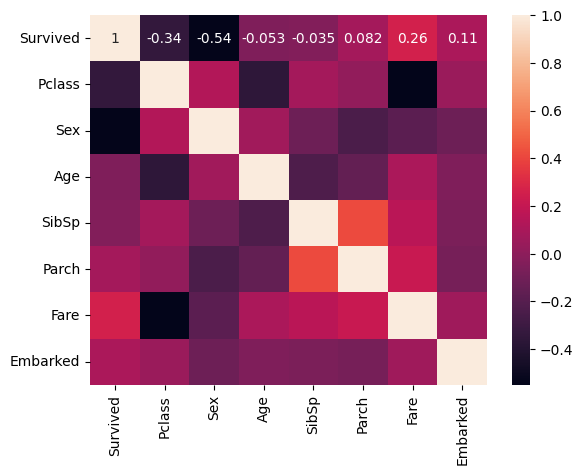

In [34]:
# Better manually select
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True)

In [27]:
train_df_fs = train_df.copy()
test_df_fs = test_df.copy()

train_df_fs = train_df_fs.drop("Age", axis=1)
train_df_fs = train_df_fs.drop("SibSp", axis=1)
train_df_fs = train_df_fs.drop("Parch", axis=1)

test_df_fs = test_df_fs.drop("Age", axis=1)
test_df_fs = test_df_fs.drop("SibSp", axis=1)
test_df_fs = test_df_fs.drop("Parch", axis=1)

print(train_df_fs.columns)
print(test_df_fs.columns)

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')
Index(['Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')


In [28]:
# Recursive feature elimination with cross-validation = RFECV
# This way is that only after model is trained, feature selection is performed


# num_models = 6
# rfecv = RFECV(estimator=LogisticRegression(solver='liblinear'), 
#               min_features_to_select=1, step=1, cv=num_models, scoring='accuracy')
# rfecv.fit(X_train_data, y_train_data)

# print("Optimal number of features: %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X_train_data.columns[rfecv.support_]))

## Dataset Preparing for Model Training

In [29]:
X_train_data = train_df.drop("Survived", axis=1)
y_train_data = train_df["Survived"]
X_test  = test_df
print("Shape of X_train", X_train_data.shape, "\nShape of y_train", y_train_data.shape, "\nShape of X_test", X_test.shape)

Shape of X_train (891, 7) 
Shape of y_train (891,) 
Shape of X_test (418, 7)


In [31]:
print("X_train:\n")
X_train_data[0:5]

X_train:



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [32]:
print("\nY_train:\n")
y_train_data[0:5]


Y_train:



0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
print("\nX_test:\n")
X_test[0:5]


X_test:



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.2)  
# 0.2 >> 20 % of dataset become validation dataset
print("Shape of X_train", X_train.shape, "\nShape of y_train", y_train.shape)
print("Shape of X_val", X_val.shape, "\nShape of y_val", y_val.shape)

Shape of X_train (712, 7) 
Shape of y_train (712,)
Shape of X_val (179, 7) 
Shape of y_val (179,)


## 04 Logistic Regression Model


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


#### Solvers for Logistic Regression

newton-cg — A newton method. Newton methods use an exact Hessian matrix. It's slow for large datasets, because it computes the second derivatives.

lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. It isn't super fast with large data sets. It will be the default solver as of Scikit-learn version 0.22.0.

liblinear — Library for Large Linear Classification. Uses a coordinate descent algorithm. Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. In other words, it moves toward the minimum in one direction at a time. It is the default solver for Scikit-learn versions earlier than 0.22.0. It performs pretty well with high dimensionality. It does have a number of drawbacks. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.

sag — Stochastic Average Gradient descent. A variation of gradient descent and incremental aggregated gradient approaches that uses a random sample of previous gradient values. Fast for big datasets.

saga — Extension of sag that also allows for L1 regularization. Should generally train faster than sag.

*** Normally the best are newton-cg and liblinear for large dataset and lbfgs for small dataset. ***

solver: (default: “lbfgs“) Provides options to choose solver algorithm for optimization. Usually default solver works great in most situations and there are suggestions for specific occasions below such as: classification problems with large or very large datasets.

If you have particular cases it’s always a good idea to monitor how solver is working on training and test data by comparing different solver functions. This can also help understand the finesse of different solvers a very interesting topic.

lbfgs: Stands for limited-memory BFGS. This solver only calculates an approximation to the Hessian based on the gradient which makes it computationally more effective. On the other hand it’s memory usage is limited compared to regular bfgs which causes it to discard earlier gradients and accumulate only fresh gradients as allowed by the memory restriction.

liblinear: More efficient solver with small datasets. Only useful for ovr (one-versus-rest) problems won’t work with multiclass problems unlike other solvers here. Also doesn’t work with l2 or none parameter values for penalty.

newton-cg: Solver which calculates Hessian explicitly which can be computationally expensive in high dimensions. 

sag: Stands for Stochastic Average Gradient Descent. More efficient solver with large datasets.

saga: Saga is a variant of Sag and it can be used with l1 Regularization. It’s a quite time-efficient solver and usually the go-to solver with very large datasets.

### Training

#### Using GridSearch to find best solver for logistic regression classifier

In [5]:
# Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Defining the logistic regression model with a high max_iter since it might take long
log_reg_model = LogisticRegression(max_iter=10000)

# Defining the search space for the grid search
param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Initializing the GridSearchCV object
grid = GridSearchCV(log_reg_model, param_grid, refit=True, cv=5)

# Fitting the grid search to the training data
grid.fit(X_train, y_train)

# Printing the best parameters found by the grid search
print("Best params: ", grid.best_params_)

In [41]:
log_reg_model = LogisticRegression(solver='liblinear', max_iter=20)
log_reg_model.fit(X_train, y_train)
accuracy_log_reg_model = round(log_reg_model.score(X_train, y_train) * 100, 2)
print("Training Accuracy of logistic regression:", accuracy_log_reg_model, '\n')

Training Accuracy of logistic regression: 81.6 



In [42]:
log_reg_model = LogisticRegression(solver='newton-cg', max_iter = 20)
log_reg_model.fit(X_train, y_train)
accuracy_log_reg_model = round(log_reg_model.score(X_train, y_train) * 100, 2)
print("Training Accuracy of logistic regression:", accuracy_log_reg_model, '\n')

Training Accuracy of logistic regression: 81.04 



In [43]:
log_reg_model = LogisticRegression(solver='sag', max_iter=4000)
log_reg_model.fit(X_train, y_train)
accuracy_log_reg_model = round(log_reg_model.score(X_train, y_train) * 100, 2)
print("Training Accuracy of logistic regression:", accuracy_log_reg_model, '\n')

Training Accuracy of logistic regression: 80.48 



## 05 Evaluation with Validation Dataset

- TN / True Negative: when a case was negative and predicted negative
- TP / True Positive: when a case was positive and predicted positive
- FN / False Negative: when a case was positive but predicted negative
- FP / False Positive: when a case was negative but predicted positive
_______________________
Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)
________________________

Recall: Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)
_______________________
F1 Score: What percent of positive predictions were correct?

F1 Score = 2*(Recall * Precision) / (Recall + Precision)
_______________________
Support: The number of actual occurrences of the class in the specified dataset. 

In [44]:
print("In valication Dataset, Total Number of People:", len(y_val))
print("Actual Result in validation dataset")
print("Survived", sum(y_val==1))
print("Not Survived", sum(y_val==0))

y_pred = log_reg_model.predict(X_val)
print("\nPrediction of Logistic Regression")
print("Survived", sum(y_pred==1))
print("Not Survived", sum(y_pred==0))

In valication Dataset, Total Number of People: 179
Actual Result in validation dataset
Survived 73
Not Survived 106

Prediction of Logistic Regression
Survived 63
Not Survived 116


In [45]:
#How to get TP, TN, FP, FN ?


# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(y_pred == 1, y_val == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(y_pred == 0, y_val == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(y_pred == 1, y_val == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(y_pred == 0, y_val == 1))


print('TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN))


TP: 47, FP: 16, TN: 90, FN: 26


In [46]:
# classification report
print("=========Classification report=======")
print(classification_report(y_val, y_pred)) 
# y_val is the real label
# y_pred is predicted label by Logistic Regression

=========Classification report=======
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.75      0.64      0.69        73

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



### Model Testing with Test Dataset

In [47]:
y_pred = log_reg_model.predict(X_test)
# print(y_pred)
print("In Test Dataset, Total Number of People:", len(y_pred))
print("Survived", sum(y_pred!=0))
print("Not Survived", sum(y_pred==0))

In Test Dataset, Total Number of People: 418
Survived 145
Not Survived 273


In [48]:
X_train_data_fs = train_df_fs.drop("Survived", axis=1)
y_train_data_fs = train_df_fs["Survived"]
X_test_fs  = test_df_fs
print("Shape of X_train", X_train_data_fs.shape, "\nShape of y_train", y_train_data_fs.shape, "\nShape of X_test", X_test_fs.shape)

print("X_train:\n", X_train_data_fs[0:5])
print("\nY_train:\n",y_train_data_fs[0:5])
print("\nX_test:\n",X_test_fs[0:5])

X_train_fs, X_val_fs, y_train_fs, y_val_fs = train_test_split(X_train_data_fs, y_train_data_fs, test_size=0.2)  
# 0.2 >> 20 % of dataset become validation dataset
print("Shape of X_train", X_train_fs.shape, "\nShape of y_train", y_train_fs.shape)
print("Shape of X_val", X_val_fs.shape, "\nShape of y_val", y_val_fs.shape)

log_reg_model_fs = LogisticRegression(solver='liblinear', max_iter=20)
log_reg_model_fs.fit(X_train_fs, y_train_fs)
accuracy_log_reg_model_fs = round(log_reg_model_fs.score(X_train_fs, y_train_fs) * 100, 2)
print("Training Accuracy of logistic regression:", accuracy_log_reg_model_fs, '\n')

print("In valication Dataset, Total Number of People:", len(y_val_fs))
print("Actual Result in validation dataset")
print("Survived", sum(y_val_fs==1))
print("Not Survived", sum(y_val_fs==0))

y_pred_fs = log_reg_model_fs.predict(X_val_fs)
print("\nPrediction of Logistic Regression")
print("Survived", sum(y_pred_fs==1))
print("Not Survived", sum(y_pred_fs==0))

# classification report
print("=========Classification report=======")
print(classification_report(y_val_fs, y_pred_fs)) 

Shape of X_train (891, 4) 
Shape of y_train (891,) 
Shape of X_test (418, 4)
X_train:
    Pclass  Sex     Fare  Embarked
0       3    1   7.2500         0
1       1    0  71.2833         1
2       3    0   7.9250         0
3       1    0  53.1000         0
4       3    1   8.0500         0

Y_train:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

X_test:
    Pclass  Sex     Fare  Embarked
0       3    1   7.8292         2
1       3    0   7.0000         0
2       2    1   9.6875         2
3       3    1   8.6625         0
4       3    0  12.2875         0
Shape of X_train (712, 4) 
Shape of y_train (712,)
Shape of X_val (179, 4) 
Shape of y_val (179,)
Training Accuracy of logistic regression: 78.09 

In valication Dataset, Total Number of People: 179
Actual Result in validation dataset
Survived 60
Not Survived 119

Prediction of Logistic Regression
Survived 61
Not Survived 118
=========Classification report=======
              precision    recall  f1-score   support


## 06 Creating own test data

In [49]:
test_df.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype=object)

Sex: {'female': 0, 'male': 1}

Embarked : {'S': 0, 'C': 1, 'Q': 2} 

In [50]:
Sex_dict = {'0' : 'female',
               '1' : 'male'}

Sex_keys = list(Sex_dict.keys())
Sex_vals = list(Sex_dict.values())

Embarked_dict = {'0' : 'S',
               '1' : 'C',
               '2' : 'Q'}

Embarked_keys = list(Embarked_dict.keys())
Embarked_vals = list(Embarked_dict.values())

In [51]:
print(test_df['Age'].value_counts())
print(test_df['Embarked'].value_counts())
print(test_df['Fare'].value_counts())
print(test_df['Parch'].value_counts())
print(test_df['Pclass'].value_counts())
print(test_df['Sex'].value_counts())
print(test_df['SibSp'].value_counts())

Age
21.0    103
24.0     17
22.0     16
30.0     15
18.0     13
       ... 
76.0      1
28.5      1
22.5      1
62.0      1
38.5      1
Name: count, Length: 79, dtype: int64
Embarked
0    270
1    102
2     46
Name: count, dtype: int64
Fare
7.7500     22
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
Sex
1    266
0    152
Name: count, dtype: int64
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64


In [52]:
print("\nTest Data Frame")
print(test_df.dtypes)


Test Data Frame
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


The columns of custom test list must be in order as in dataset

In [80]:
print("Please fill in the information of the person you want to predict")
Age         = input("Enter Age:(22-80)")
Embarked    = input("Enter Port of Embarkation:(0,1,2)")
Fare        = input("Enter Fare:")
Parch       = input("Enter Number of parents and children:")
Pclass      = input("Enter Ticket class :(3,2,1)")
Sex         = input("Enter Sex: (0,1)")
SibSp       = input("Enter Number of siblings and spouse :(0-5)")

custom_test_list = []
custom_test_list.append(int(Pclass))
Sex_ids = Sex_keys[Sex_vals.index(Sex)]
custom_test_list.append(int(Sex_ids))
custom_test_list.append(float(Age))
custom_test_list.append(int(SibSp))
custom_test_list.append(int(Parch))
custom_test_list.append(float(Fare))
Embarked_ids = Embarked_keys[Embarked_vals.index(Embarked)]
custom_test_list.append(int(Embarked_ids))

print("Own custom test dataset:",custom_test_list)

Please fill in the information of the person you want to predict


TypeError: list indices must be integers or slices, not str

In dataset, 0 = die, 1 = survive.

In [ ]:
custom_test = np.array([custom_test_list])
y_pred = log_reg_model.predict(custom_test)
print("Y predict: ",y_pred)
print("\n")
if y_pred == 0:
  print("This person will not survive.") 
else:
  print("This person will survive.")

Y predict:  [0]


This person will not survive.
